In [63]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_excel('../data/health_screenings_2020_1000ea.xlsx')

In [65]:
data1 = data.loc[:, ['gender', 'height', 'weight', 'waist', 'smoking', 'drinking']]
# data1.loc[data1['gender']==1, ['gender']]
drinking = data1.groupby(['gender', 'drinking'])['drinking'].count()
smoking = data1.groupby(['gender', 'smoking'])['smoking'].count()

In [66]:
# 성별 음주 여부 및 흡연 상태 막대 그래프
drinking = drinking.to_frame(name='count')
drinking = drinking.reset_index()

In [67]:
gender = {1: 'male', 2: 'female'}
drinking['gender'] = drinking['gender'].map(gender)
drinking['drinking'] = drinking['drinking'].replace(0, 'Non-drinking').replace(1, 'Drinking')

In [68]:
drinking

,gender,drinking,count
0,male,Non-drinking,126
1,male,Drinking,356
2,female,Non-drinking,305
3,female,Drinking,213


In [69]:
smoking = smoking.to_frame(name='count')
smoking = smoking.reset_index()

In [70]:
smoking_types = {1: 'Non-smoking', 2: 'Non-smoking', 3:'Smoking'}
smoking['gender'] = smoking['gender'].map(gender)
smoking['smoking'] = smoking['smoking'].map(smoking_types)

In [71]:
smoking

,gender,smoking,count
0,male,Non-smoking,145
1,male,Non-smoking,176
2,male,Smoking,161
3,female,Non-smoking,488
4,female,Non-smoking,12
5,female,Smoking,18


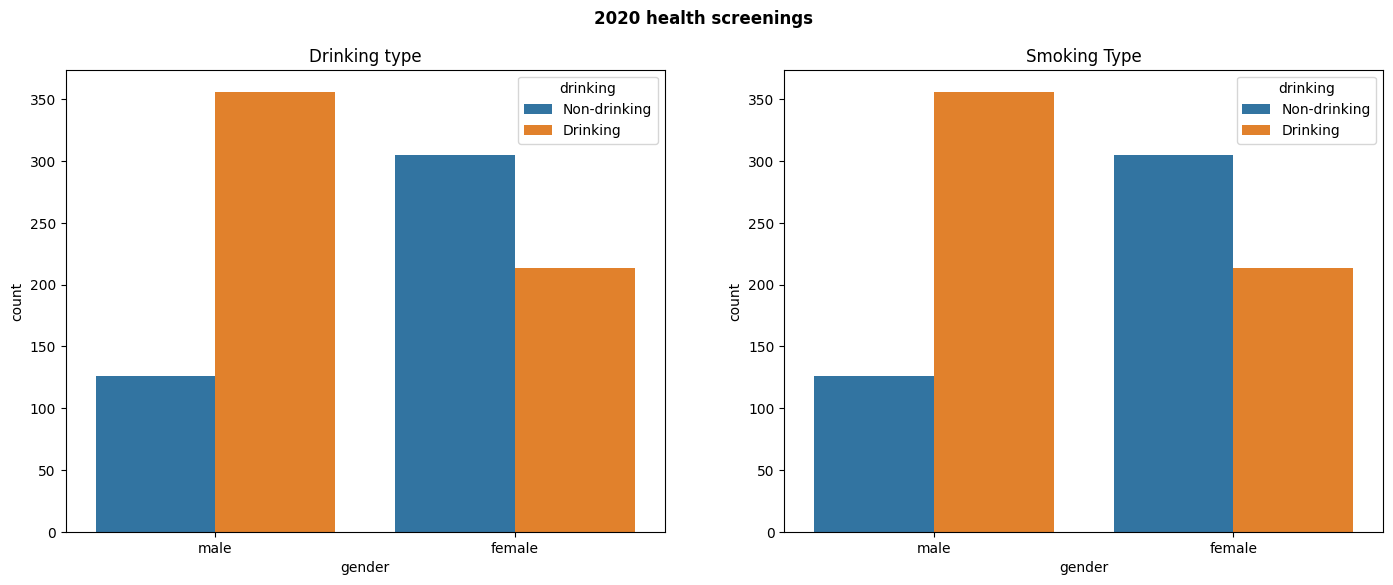

In [72]:
fig = plt.figure(figsize=(17,6))

area1 = fig.add_subplot(1,2,1)
area2 = fig.add_subplot(1,2,2)

ax1 = sns.barplot(data=drinking, x='gender', y='count', hue='drinking', ax=area1)
ax2 = sns.barplot(data=drinking, x='gender', y='count', hue='drinking', ax=area2)

fig.suptitle('2020 health screenings', fontweight='bold')
ax1.set_title('Drinking type')
ax2.set_title('Smoking Type')

plt.show()

In [73]:
data.columns

Index(['year', 'city_code', 'gender', 'age_code', 'height', 'weight', 'waist',
       'eye_left', 'eye_right', 'hear_left', 'hear_right', 'systolic',
       'diastolic', 'blood_sugar', 'cholesterol', 'triglycerides', 'HDL',
       'LDL', 'hemoglobin', 'urine_protein', 'serum', 'AST', 'ALT', 'GTP',
       'smoking', 'drinking', 'oral_check', 'dental_caries', 'tartar',
       'open_date'],
      dtype='object')

In [75]:
data2 = data.loc[:, ['gender','weight','waist']]